<a href="https://colab.research.google.com/github/jessicamargala/knn-algorithm/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data
# Import the data set
fruits = pd.read_table('fruit_data_set.txt') 

df = pd.read_table('fruit_data_set.txt', delim_whitespace=True, names=('width','height','fruit_name'))
df = df[['width', 'height', 'fruit_name']] # Taking a subset of columns
df.head()



,width,height,fruit_name
192,8.4,7.3,apple
180,8.0,6.8,apple
176,7.4,7.2,apple
86,6.2,4.7,mandarin
84,6.0,4.6,mandarin


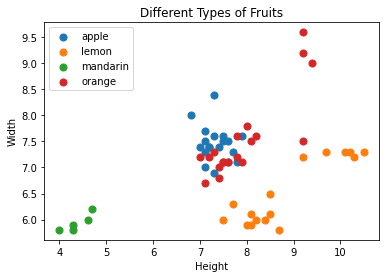

In [3]:
# Create data frame for fruit data and assign random colors to each category of fruit
np.random.seed(seed=40)
df = pd.read_table('fruit_data_set.txt', delim_whitespace=True, names=('width', 'height','fruit_name'))

cmap = plt.cm.get_cmap('Spectral')
color_dict = pd.Series({k:cmap(np.random.rand()) for k in df['fruit_name'].unique()})
color_dict.name = 'color_dict'
df = pd.merge(df, color_dict, how='left', left_on='fruit_name', right_index=True)

# Produce a legend with the unique colors from the scatter and plot graph for visualization
fig,ax = plt.subplots()
for k,d in df.groupby(df['fruit_name']):
    ax.scatter(d['height'], d['width'], s = 50, label=k )
plt.legend(loc=2)
plt.xlabel("Height")
plt.ylabel("Width")
plt.title("Different Types of Fruits")
plt.show()


In [4]:
from math import sqrt
# Helper functions to convert our data set into a usable source for our algorithm

# Function to load our data into a list of data points (list of list)
def load_data_set(filename):
  file = open(filename, "r")
  dataset = [(line.strip()).split() for line in file]
  file.close() 
  return dataset

dataset = load_data_set('fruit_data_set.txt')
print(dataset)

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

[['192', '8.4', '7.3', 'apple'], ['180', '8', '6.8', 'apple'], ['176', '7.4', '7.2', 'apple'], ['86', '6.2', '4.7', 'mandarin'], ['84', '6', '4.6', 'mandarin'], ['80', '5.8', '4.3', 'mandarin'], ['80', '5.9', '4.3', 'mandarin'], ['76', '5.8', '4', 'mandarin'], ['178', '7.1', '7.8', 'apple'], ['172', '7.4', '7', 'apple'], ['166', '6.9', '7.3', 'apple'], ['172', '7.1', '7.6', 'apple'], ['154', '7', '7.1', 'apple'], ['164', '7.3', '7.7', 'apple'], ['152', '7.6', '7.3', 'apple'], ['156', '7.7', '7.1', 'apple'], ['156', '7.6', '7.5', 'apple'], ['168', '7.5', '7.6', 'apple'], ['162', '7.5', '7.1', 'apple'], ['162', '7.4', '7.2', 'apple'], ['160', '7.5', '7.5', 'apple'], ['156', '7.4', '7.4', 'apple'], ['140', '7.3', '7.1', 'apple'], ['170', '7.6', '7.9', 'apple'], ['342', '9', '9.4', 'orange'], ['356', '9.2', '9.2', 'orange'], ['362', '9.6', '9.2', 'orange'], ['204', '7.5', '9.2', 'orange'], ['140', '6.7', '7.1', 'orange'], ['160', '7', '7.4', 'orange'], ['158', '7.1', '7.5', 'orange'], ['21

In [5]:
# Step 1: Calculate the Euclidian distance between two rows in our dataset (two different data points)

def get_distance(data1, data2):
  """Caluclates the distance between two vectors 

    Parameters
    ----------
    data1 : vector
        A row from our data set
    data2 : vector
        A row from our data set

    Returns
    -------
    sqrt(distance)
        the euclidian distance between the two data points
  """
  distance = 0.0
  for i in range(len(data1)-1):
    distance += (data1[i] - data2[i])**2
  return sqrt(distance)

In [6]:
# Step 2: Get Nearest Neighbors by sorting the distances in a non-decreasing fashion and select the first k neighbors

def get_neighbors(train, test_data, k):
  """Locates the most similar neighbors by sorting by distances

    Parameters
    ----------
    train : list
        A list of rows containing pre-existing data to train algorithm 
    test_data : vector
        A row of data that needs to be classified
    k : int
        The number of desired neighbors

    Returns
    -------
    neighbors
        the k closest training data points
  """
  distances = list()                            # Initialize list of distances

  for train_data in train:                      
    dist = get_distance(test_data, train_data)  # Find distance between inputted test_data and every train_data in train
    distances.append((train_data, dist))         # Add this distance to our list of distances

  distances.sort(key=lambda tup: tup[1])        # Sort list of distances in non-decreasing fashion
  neighbors = list()                            # Initialize list of neigboring points to test_data
  
  for i in range(k):
    neighbors.append(distances[i][0])           # Add first k training data points according to their distances to list of neighboring points
  return neighbors                              # Return the k closest training data points (already classfified points) to the test data point 

In [7]:
# Step 3: Make predictions based on the k closest training data points from get_neigbors() function

def predict(train, test_data, k):
  """Makes a classification prediction using k nearest neighbors

    Parameters
    ----------
    train : list
        A list of rows containing pre-existing data to train algorithm 
    test_data : vector
        A row of data that needs to be classified
    k : int
        The number of desired neighbors

    Returns
    -------
    prediction
        the most represented class among the k nearest neighbors
  """
  neighbors = get_neighbors(train, test_data, k)
  classes = [data_point[-1] for data_point in neighbors]  # Sorted list of k closest training data points from get_neighbors()
  print(f"The {k} closest classes: {classes}")
  prediction = max(set(classes), key=classes.count)       # Take the class with the highest frequency
  print(f"The KNN algorithm classifies the data point {test_data} as a {prediction}")
                                      

In [8]:
# Test the kNN on the Fruits dataset
filename = 'fruit_data_set.txt'
dataset = load_data_set(filename)


In [9]:
from sklearn.model_selection import train_test_split
# Making test set and train set

x = df ['height']
y = df ['width']
# mass = df ['mass']
label = df ['fruit_name']

# Making test and train arrays using the method in sklearn package
# Randomly assign test cases and train cases. 
# Choosing the test size to be 30% of the data therefor train would be 70% of the dataset
# mass_train, mass_test, 
height_train, height_test, width_train, width_test, label_train, label_test = train_test_split (x , y , label, test_size = 0.3)



In [10]:
# Populating training data with the right values
training_data = np.column_stack((width_train, height_train, label_train))

# Populating the testing data 
testing_data = np.column_stack((width_test, height_test, label_test))

In [11]:
# Ask user for the number of K
k = 5

k = input("Enter the value of k : ")

k = int(k)


Enter the value of k : 5


In [12]:
import random 
for i in range (10):
    predict(training_data, random.choice(testing_data), k)
    print("\n")


The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'orange', 'orange']
The KNN algorithm classifies the data point [6.0 4.6 'mandarin'] as a mandarin


The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'orange', 'orange']
The KNN algorithm classifies the data point [6.0 4.6 'mandarin'] as a mandarin


The 5 closest classes: ['apple', 'orange', 'orange', 'apple', 'orange']
The KNN algorithm classifies the data point [7.1 7.6 'orange'] as a orange


The 5 closest classes: ['apple', 'apple', 'apple', 'apple', 'apple']
The KNN algorithm classifies the data point [7.4 7.4 'apple'] as a apple


The 5 closest classes: ['apple', 'apple', 'apple', 'apple', 'apple']
The KNN algorithm classifies the data point [8.0 6.8 'apple'] as a apple


The 5 closest classes: ['orange', 'apple', 'apple', 'apple', 'orange']
The KNN algorithm classifies the data point [7.5 7.6 'apple'] as a apple


The 5 closest classes: ['apple', 'orange', 'orange', 'apple', 'orange']
The KNN algorithm class

The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'mandarin', 'mandarin']
The KNN algorithm classifies the data point [5.9 4.3 'mandarin'] as a mandarin
82
[82]
The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'mandarin', 'mandarin']
The KNN algorithm classifies the data point [5.9 4.3 'mandarin'] as a mandarin
164
[82, 164]
The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'mandarin', 'mandarin']
The KNN algorithm classifies the data point [5.9 4.3 'mandarin'] as a mandarin
328
[82, 164, 328]
The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'mandarin', 'mandarin']
The KNN algorithm classifies the data point [5.9 4.3 'mandarin'] as a mandarin
656
[82, 164, 328, 656]
The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'mandarin', 'mandarin']
The KNN algorithm classifies the data point [5.9 4.3 'mandarin'] as a mandarin
1312
[82, 164, 328, 656, 1312]
The 5 closest classes: ['mandarin', 'mandarin', 'mandarin', 'mandarin', 'mandarin']
The K

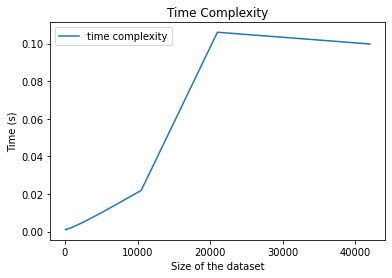

In [13]:
import random
import numpy
import time
import matplotlib.pyplot as plt

test = [156,	7.7,	7.1]
data_size = []
time_taken_for_that_data = []

for i in range(10):
  same_list = training_data
  training_data = numpy.append(training_data, same_list, axis=0)
  ##print('\n\n\n\n')
  ##print(training_data)
  ##print('\n')
  ##print(len(training_data))
  ##print('\n')
  start_time = time.time()
  # I have it so that it chooses an input in the test data at random but we could hardcode
  # inputing the data is
  predict(training_data, testing_data[0], k)
  time_taken_for_that_data.append(time.time() - start_time)
  ##print("--- %s seconds ---" % (time.time() - start_time))
  data_size.append(len(training_data))
  ##print('\n')
  print(len(training_data));
  print(data_size);

x_data = data_size
y_data = time_taken_for_that_data

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_data, y_data, label='time complexity')
ax.set_xlabel('Size of the dataset')
ax.set_ylabel('Time (s)')
ax.set_title('Time Complexity')
ax.legend()
plt.show()
